In [ ]:
!pip install --upgrade --quiet yfinance==0.1.74
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
import numpy as np
import math
from collections import Counter
from scipy.stats import bartlett
import statistics as st
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns 
import networkx as nx
import seaborn as sns
from tqdm import tqdm_notebook
from scipy.optimize import minimize, linprog
import seaborn as sns
from scipy.stats import norm
from cvxopt import matrix, solvers
from scipy.optimize import minimize
from scipy.stats import shapiro, normaltest, anderson, kstest, t, norm
tickers = ['2CRSI.PA', 'AB.PA', 'ABCA.PA', 'ABEO.PA', 'ABNX.PA', 'ABVX.PA', 'ABLD.PA', 'ABO.PA', 'ACAN.PA', 'AC.PA', 'AAC.PA', 'AACW.PA', 'EOS.PA', 'ATI.PA', 'ALDV.PA', 'ADOC.PA', 'ADP.PA', 'ADUX.PA', 'ADVI.PA', 'AELIS.PA', 'AKOM.PA', 'AFME.PA', 'AF.PA', 'AI.PA', 'AIR.PA', 'AKW.PA', 'AAA.PA', 'ABIO.PA', 'ALD.PA', 'CDA.PA', 'ALO.PA', 'LTA.PA', 'ALTA.PA', 'AREIT.PA', 'ATE.PA', 'ALTUR.PA', 'AMPLI.PA', 'AMUN.PA', 'ANTIN.PA', 'APAM.PA', 'APM.PA', 'ARAMI.PA', 'MT.PA', 'ARG.PA', 'AKE.PA', 'ARTE.PA', 'PRC.PA', 'ARTO.PA', 'ASY.PA', 'ATEME.PA', 'ATLD.PA', 'ATO.PA', 'AUB.PA', 'AUGR.PA', 'AURE.PA', 'AURS.PA', 'AVT.PA', 'CS.PA', 'AXW.PA', 'BAIN.PA', 'BALYO.PA', 'BUI.PA', 'BASS.PA', 'BLC.PA', 'BLV.PA', 'BEN.PA', 'BB.PA', 'BIG.PA', 'BIM.PA', 'BLEE.PA', 'BNP.PA', 'BOI.PA', 'BOL.PA', 'BON.PA', 'BOTHE.PA', 'BSD.PA', 'EN.PA', 'BVI.PA', 'BUR.PA', 'CAT31.PA', 'CAFO.PA', 'CBDG.PA', 'CAP.PA', 'CARM.PA', 'CARP.PA', 'CA.PA', 'CO.PA', 'CAS.PA', 'CATG.PA', 'CTRG.PA', 'CATR.PA', 'CBOT.PA', 'CGM.PA', 'CYAD.PA', 'CFI.PA', 'CGG.PA', 'CGGBT.PA', 'CRI.PA', 'CHSR.PA', 'CDI.PA', 'CLA.PA', 'COM.PA', 'CNV.PA', 'COFA.PA', 'COH.PA', 'RE.PA', 'ODET.PA', 'COUR.PA', 'COV.PA', 'COVH.PA', 'CRAP.PA', 'CRAV.PA', 'CRBP2.PA', 'CIV.PA', 'CRLA.PA', 'CRLO.PA', 'CMO.PA', 'CNF.PA', 'CCN.PA', 'CAF.PA', 'CRSU.PA', 'CRTO.PA', 'ACA.PA', 'CROS.PA', 'SX.PA', 'BN.PA', 'AM.PA', 'DSY.PA', 'DBV.PA', 'DEE.PA', 'DEEW.PA', 'DEEZR.PA', 'DEEZW.PA', 'DKUPL.PA', 'DBG.PA', 'DGE.PA', 'DMSIM.PA', 'DPAM.PA', 'EDEN.PA', 'EDF.PA', 'FGR.PA', 'EKI.PA', 'ELEC.PA', 'EEM.PA', 'ELIOR.PA', 'ELIS.PA', 'ENGI.PA', 'EQS.PA', 'ERA.PA', 'ERYP.PA', 'ESI.PA', 'ESP.PA', 'EL.PA', 'ES.PA', 'EFI.PA', 'RF.PA', 'KINGS.PA', 'KINGW.PA', 'EUR.PA', 'EAPI.PA', 'ERF.PA', 'ENX.PA', 'ETL.PA', 'EGR.PA', 'EXN.PA', 'EXE.PA', 'EXPL.PA', 'EO.PA', 'FAYE.PA', 'FDJ.PA', 'FCMC.PA', 'FALG.PA', 'SACI.PA', 'ORIA.PA', 'FGA.PA', 'BERR.PA', 'EBPF.PA', 'FOAF.PA', 'FINM.PA', 'FNTS.PA', 'FIPP.PA', 'FNAC.PA', 'LEBL.PA', 'EURS.PA', 'INEA.PA', 'FLY.PA', 'SPEL.PA', 'FORE.PA', 'FORSE.PA', 'FDE.PA', 'FREY.PA', 'GALIM.PA', 'GAM.PA', 'GEA.PA', 'GFC.PA', 'GNE.PA', 'GNRO.PA', 'GNFT.PA', 'GV.PA', 'SIGHT.PA', 'GET.PA', 'GLO.PA', 'GPE.PA', 'GRVO.PA', 'CEN.PA', 'FLO.PA', 'GOE.PA', 'IRD.PA', 'GJAJ.PA', 'PARP.PA', 'SFPI.PA', 'GTBP.PA', 'GTT.PA', 'GBT.PA', 'GUI.PA', 'PIG.PA', 'HDF.PA', 'RMS.PA', 'HEXA.PA', 'HCO.PA', 'HOLN.PA', 'HDP.PA', 'ICAD.PA', 'IDL.PA', 'IDIP.PA', 'NK.PA', 'IMDA.PA', 'INFE.PA', 'INF.PA', 'IPH.PA', 'ITP.PA', 'ITXT.PA', 'IVA.PA', 'IPN.PA', 'IPS.PA', 'ITE.PA', 'JBOG.PA', 'JCQ.PA', 'DEC.PA', 'KOF.PA', 'KER.PA', 'LI.PA', 'KORI.PA', 'OR.PA', 'LACR.PA', 'MMB.PA', 'LAT.PA', 'LPE.PA', 'LOUP.PA', 'LSS.PA', 'LR.PA', 'LHYFE.PA', 'LIN.PA', 'FII.PA', 'LNA.PA', 'LBIRD.PA', 'MC.PA', 'LYS.PA', 'MRM.PA', 'MAAT.PA', 'MDM.PA', 'MALT.PA', 'MTU.PA', 'MAN.PA', 'IAM.PA', 'MKEA.PA', 'MAU.PA', 'MBWS.PA', 'MBWSZ.PA', 'MCPHY.PA', 'EDI.PA', 'MEDCL.PA', 'MEMS.PA', 'MERY.PA', 'MRK.PA', 'MRN.PA', 'METEX.PA', 'MMT.PA', 'ML.PA', 'MONC.PA', 'MONT.PA', 'MHM.PA', 'NACON.PA', 'NANO.PA', 'NAVYA.PA', 'NEOEN.PA', 'NRO.PA', 'NEX.PA', 'NXI.PA', 'NEXTS.PA', 'NHOA.PA', 'COX.PA', 'NOKIA.PA', 'NR21.PA', 'NRG.PA', 'SBT.PA', 'OLG.PA', 'ORA.PA', 'ORAP.PA', 'ORAPB.PA', 'OREGE.PA', 'ORP.PA', 'OSE.PA', 'OVH.PA', 'PID.PA', 'PAR.PA', 'PARRO.PA', 'PABSA.PA', 'PABSB.PA', 'PSAT.PA', 'PAT.PA', 'PCA.PA', 'RI.PA', 'PERR.PA', 'PEUG.PA', 'VACBS.PA', 'VACBT.PA', 'VAC.PA', 'PVL.PA', 'POM.PA', 'POXEL.PA', 'PREC.PA', 'PROAC.PA', 'PWG.PA', 'PUB.PA', 'QDT.PA', 'RAL.PA', 'GDS.PA', 'RX.PA', 'RCO.PA', 'RNO.PA', 'RXL.PA', 'RBT.PA', 'CBR.PA', 'CBE.PA', 'RBO.PA', 'ROTH.PA', 'RUI.PA', 'SK.PA', 'SAF.PA', 'SGO.PA', 'SABE.PA', 'SAMS.PA', 'SAN.PA', 'DIM.PA', 'SAVE.PA', 'CBSM.PA', 'SLB.PA', 'SU.PA', 'SCR.PA', 'SCHP.PA', 'SGRO.PA', 'SLCO.PA', 'SELER.PA', 'SEFER.PA', 'SESG.PA', 'SESL.PA', 'SRP.PA', 'SII.PA', 'SMCP.PA', 'SMTPC.PA', 'SFCA.PA', 'GLE.PA', 'SW.PA', 'SEC.PA', 'SOG.PA', 'SOI.PA', 'LOCAL.PA', 'S30.PA', 'SOLB.PA', 'SO.PA', 'SOP.PA', 'SPIE.PA', 'SQI.PA', 'DPT.PA', 'STF.PA', 'STLA.PA', 'STM.PA', 'SWP.PA', 'SDG.PA', 'TKTT.PA', 'TAYN.PA', 'TCHCS.PA', 'TE.PA', 'TEP.PA', 'TVRB.PA', 'TRACT.PA', 'TERBS.PA', 'TFI.PA', 'TFF.PA', 'HO.PA', 'THEP.PA', 'TKO.PA', 'TIPI.PA', 'TITC.PA', 'TTE.PA', 'EC.PA', 'TOUP.PA', 'EIFF.PA', 'TNG.PA', 'TRAN.PA', 'TRANW.PA', 'TRI.PA', 'UBI.PA', 'URW.PA', 'UNBL.PA', 'UFF.PA', 'FPG.PA', 'FR.PA', 'VK.PA', 'VKBS.PA', 'VLA.PA', 'VANTI.PA', 'VANBS.PA', 'VIE.PA', 'VRLA.PA', 'VMX.PA', 'VETO.PA', 'VCT.PA', 'VIL.PA', 'RIN.PA', 'DG.PA', 'VIRP.PA', 'VTR.PA', 'VIV.PA', 'VLTSA.PA', 'VRAP.PA', 'WAGA.PA', 'WAVE.PA', 'MF.PA', 'WLN.PA', 'XFAB.PA', 'XIL.PA', 'CV.PA']

>**Сбор данных по дневным ценам активов и дневным объемам продаж.**

In [ ]:
%%capture
data = yf.download(tickers, start="2017-01-01", end="2017-12-31", interval = "1d")

In [ ]:
data_close = data["Close"]
data_volume = data["Volume"] # массив объёма продаж

counters = {}
for col in data_close.columns:
  counters[col] = 0
  for row in data_close.index:
    if np.isnan(data_close[col][row]):
      counters[col] += 1
to_drop = []
for col in counters:
  if counters[col] > 20:
    to_drop.append(col)

In [ ]:
data_close.drop(to_drop, axis = 1, inplace=True) 
data_volume.drop(to_drop, axis = 1, inplace=True) 

>**Удаляем данные о днях, для которых более 300 активов заполнены NaN значениями.**

In [ ]:
# удаляем строки (дни)
rows_to_drop = {}
for row in data_close.index:
    rows_to_drop[row] = 0
    for col in data_close.columns:
        if pd.isna(data_close[col][row]):
            rows_to_drop[row] += 1
for row in rows_to_drop:
    if rows_to_drop[row] > 300: #удаляем строку, если в этот день не торговались хотя бы 300 акций
        data_close.drop(row, axis = 0, inplace = True)
        data_volume.drop(row, axis = 0, inplace = True)

>**Удаляем данные об активах, которые не торговались более 230 дней из 255.**

In [ ]:
counters_zero_volume = {}
for col in data_close.columns:
  counters_zero_volume[col] = 0
  for row in data_close.index:
    if data_volume[col][row]==0:
      counters_zero_volume[col] += 1
to_drop_zero_volume = []
for col in counters_zero_volume:
  if counters_zero_volume[col] > 230:
    to_drop_zero_volume.append(col)

In [ ]:
data_close.drop(to_drop_zero_volume, axis = 1, inplace=True) 
data_volume.drop(to_drop_zero_volume, axis = 1, inplace=True) 

In [ ]:
# в каких столбцах остались NaN значения
counters_nan = []
for col in data_close.columns:
  if data_close[col].isnull().sum() > 0:
    print(col)
    counters_nan.append(col)

In [ ]:
data_close.drop(counters_nan, axis = 1, inplace=True) 
data_volume.drop(counters_nan, axis = 1, inplace=True) 

>**Преобразование данных по ценам в данные по доходностям.**

In [ ]:
profitability = np.log(data_close.pct_change()+1)

for col in profitability.columns: # заполнение NaN знаений средним по акции
    profitability[col].fillna(profitability[col].mean(), inplace=True)

In [ ]:
std_arr=[]
mean_arr=[]
for col in profitability.columns:
  std_arr.append(np.std(profitability[col].values))
  mean_arr.append(np.mean(profitability[col].values))
tickers_names = list(profitability.columns) 

In [ ]:
profitability

,AAA.PA,AB.PA,ABCA.PA,ABEO.PA,ABNX.PA,ABVX.PA,AC.PA,ACA.PA,ACAN.PA,ADOC.PA,...,VIV.PA,VK.PA,VLA.PA,VLTSA.PA,VMX.PA,VRAP.PA,VTR.PA,WAVE.PA,WLN.PA,XIL.PA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02,0.007183,-0.002263,-0.000527,0.001758,-0.005924,0.001239,0.000731,0.000596,0.001102,-0.005641,...,0.000844,-0.001176,-0.000531,0.000518,0.000514,0.000162,0.000023,0.001139,0.001646,0.005304
2017-01-03,0.441833,0.050010,0.000000,-0.000741,0.006952,-0.004773,0.024068,0.031946,0.000000,-0.005670,...,0.000829,0.019262,-0.006329,0.001124,-0.027507,0.010977,0.000000,-0.014401,-0.000187,0.120200
2017-01-04,0.000000,0.075391,0.002782,-0.012307,-0.018649,0.011102,0.022433,0.004482,-0.015504,-0.047954,...,0.005507,-0.008127,-0.028988,0.002245,-0.020121,-0.001311,-0.006653,0.002195,-0.008064,0.124491
2017-01-05,0.000000,-0.030214,-0.012579,-0.006399,-0.009456,0.044726,0.015251,0.002436,0.015504,-0.027570,...,0.001646,0.000728,0.022618,0.006704,0.012121,-0.001751,-0.007774,-0.002745,-0.005097,0.077535
2017-01-06,-0.014389,-0.058097,-0.022761,-0.004921,-0.002378,0.010503,-0.002768,0.000405,0.000000,-0.028351,...,0.004922,0.028987,-0.003200,0.003335,-0.028515,-0.005710,-0.003505,-0.007615,-0.024328,-0.112239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-21,0.000000,0.001213,0.001594,0.006079,0.031749,0.036453,0.004201,-0.003893,0.024098,-0.007749,...,0.010951,0.029202,-0.007299,-0.061311,0.007194,0.000420,0.001333,0.002436,0.002368,-0.004866
2017-12-22,0.000000,-0.015883,-0.003190,-0.000242,-0.042560,-0.024548,0.003587,-0.007117,0.023531,-0.005674,...,-0.008312,0.045553,0.010929,-0.004876,-0.003591,0.000000,0.001331,0.006548,-0.002368,-0.007098
2017-12-27,0.000000,0.004914,-0.001599,0.000242,0.016173,-0.007126,0.004168,-0.007168,0.000000,-0.021568,...,-0.000659,0.037657,-0.014599,-0.004900,0.031861,-0.007159,0.007421,-0.015346,0.015725,-0.026887


In [ ]:
std_dict = {tickers_names[i]: std_arr[i] for i in range(len(tickers_names))}
mean_dict = {tickers_names[i]: mean_arr[i] for i in range(len(tickers_names))}
std_dict_sorted = dict(sorted(std_dict.items(), key=lambda item: item[1]))
mean_dict_sorted = dict(sorted(mean_dict.items(), key=lambda item: item[1]))

In [ ]:
def get_return_mean_cov(profitability_matrix, tickers):
  r_matrix = {}
  for ticker in tickers:
    r_matrix[ticker] = profitability[ticker].values
  r_df = pd.DataFrame(r_matrix).dropna()
  return r_df.values, r_df.mean().values, r_df.cov().values

>**Поиск портфеля с наименьшим  conditional number происходит в цикле: на каждой итерации случайным образом выбираются 20 активов и считается их conditional number. Набор активов с наименьшим conditional number используется в следующих пунктах.**

In [ ]:
import random
cond_num=1000
twenty_rickers = []
for i in range(10000):
  random_20_tickers = random.sample(tickers_names, 20)
  return_matrix, mean_vec, cov_matrix = get_return_mean_cov(profitability,random_20_tickers) 
  eigenvec = np.linalg.eigvals(cov_matrix)
  conditional_number = (max(eigenvec) /  min(eigenvec))
  if (conditional_number < cond_num):
    cond_num = conditional_number
    twenty_tickers = random_20_tickers

In [ ]:
twenty_tickers = ['GLO.PA', 'NANO.PA', 'VIE.PA', 'MAN.PA', 'UFF.PA', 'COUR.PA', 'COFA.PA', 'CROS.PA', 'SX.PA', 'TIPI.PA', 'LIN.PA', 'STM.PA', 'GPE.PA', 'JBOG.PA', 'IMDA.PA', 'MALT.PA', 'EDEN.PA', 'ERF.PA', 'SESL.PA', 'FCMC.PA']

>**Conditional number.**

In [ ]:
return_matrix, mean_vec, cov_matrix = get_return_mean_cov(profitability,twenty_tickers)
eigenvec = np.linalg.eigvals(cov_matrix)
conditional_number = (max(eigenvec) /  min(eigenvec))
determinant = np.linalg.det(cov_matrix)
print("Conditional number = " + str(conditional_number))

Conditional number = 9.181093645715006


In [ ]:
std_twenty_arr = []
mean_twenty_arr = []
for i in range(len(twenty_tickers)):
  std_twenty_arr.append(std_dict[twenty_tickers[i]])
  mean_twenty_arr.append(mean_dict[twenty_tickers[i]])

#**1.Истинный оптимальный портфель в модели Марковица с заданным отношением к риску.**

>**$-E(x)+b\sigma(x) -> min$ \
$x_1+x_2+...+x_N=1$ \
$x_i≥0$**

In [ ]:
def objective_function(X, mean_vec, cov_matrix, b):
    return (-np.dot(mean_vec, X)) + b * np.dot(np.dot(X, cov_matrix), X.T)
def optimize_portfolio(mean_vec,cov_matrix,b,bounds,objective_function=objective_function):
        N = 20
        X = np.ones(N)
        X = X / X.sum()
        bounds = bounds * N
        constraints=[]
        constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
        return minimize(objective_function, X, args=(mean_vec, cov_matrix, b), method='SLSQP', constraints=constraints, bounds=bounds).x

In [ ]:
beta = 0.95
b = (np.sqrt(2 * np.pi) *(1 - beta) )**(-1) * np.exp(-(norm.cdf(norm.ppf(beta))**2 / 2))
X = optimize_portfolio(mean_vec, cov_matrix, b, bounds=((0, 1),))
def plot_weights_histogram(weights, data, ra, ra_ind=True):
    plt.figure(figsize=(15,5))
    x_values = data
    x = np.arange(len(weights))
    plt.xlabel('Ticker', size=30)
    plt.ylabel('Weight', size=30)
    height = weights
    plt.bar(x, height=height)
    plt.xticks(x, x_values, rotation='90')
    plt.grid()
print('b =', b)

b = 5.081181129383776


>**Значение целевой функции (для портфеля в модели Марковица с заданным отношением к риску $β$=0.95)**

In [ ]:
objective_value_est = objective_function(X, mean_vec, cov_matrix, b)
print("Objective func value = " + str(objective_value_est))

Objective func value = -0.0012223965531922138


>**Состав оптимального портфеля в модели Марковица с заданным отношением к риску $β$=0.95**

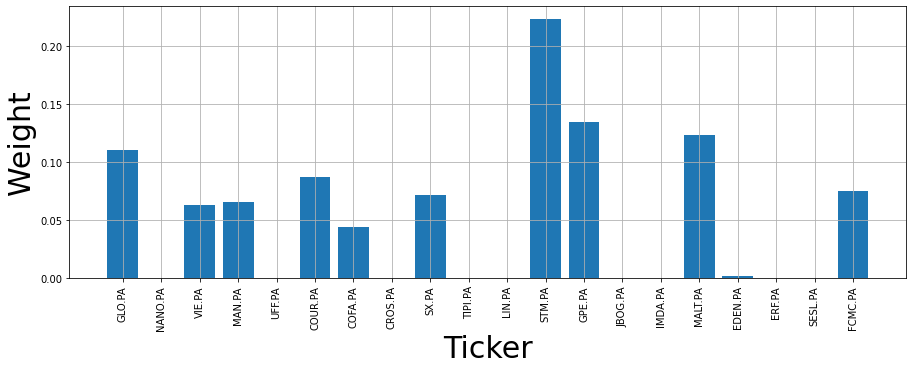

In [ ]:
plot_weights_histogram(X, twenty_tickers, b)

>**STM.PA:** STMicroelectronics N.V. is a global leader in the semiconductor market serving customers across the spectrum of sense and power and automotive products and embedded processing solutions. \
**MALT.PA:** Malteries Franco-Belges specializes in the production of malt. \
**GPE.PA:** Groupe Pizzorno Environnement SA engages in the provision of environmental services. Its operations include waste collection; transportation; sorting and cleaning; storage and processing facilities for household and industrial waste; cleaning and sanitation solutions.

In [ ]:
def get_risk(X, cov_matrix):
    return np.sqrt(np.dot(np.dot(X, cov_matrix), X.T))
def efficient_frontier(risk_porfolio,returns,mean_returns,cov_matrix,bounds,target=None):
    X = np.ones(returns.shape[1])
    X = X / X.sum()
    bounds = bounds * returns.shape[1]
    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    if target:
        constraints.append({'type': 'eq','args': (mean_returns,),'fun': lambda X, mean_returns: portfolio_return - np.dot(X, mean_returns)})
    return minimize(risk_porfolio, X,args=(cov_matrix),method='SLSQP',constraints=constraints,bounds=bounds).x

In [ ]:
risk_optimal_M = get_risk(X, cov_matrix)
e_optimal_M = np.dot(X, mean_vec)

In [ ]:
sigmas = []
e = []
bounds = ((0.0, 1.0),)
r_matrix, mean_vec, cov_matrix = get_return_mean_cov(profitability, twenty_tickers)
X_min_risk = efficient_frontier(get_risk,r_matrix,mean_vec,cov_matrix,bounds)
min_risk = get_risk(X_min_risk, cov_matrix)
min_risk_preturn = np.dot(X_min_risk, mean_vec)
target = np.linspace(min_risk_preturn, 0.05, 500)
for portfolio_return in tqdm_notebook(target):
    X_ef = efficient_frontier(get_risk,r_matrix,mean_vec,cov_matrix,bounds,target=portfolio_return)
    sigmas.append(get_risk(X_ef, cov_matrix))
    e.append(np.dot(X_ef, mean_vec))

  0%|          | 0/500 [00:00<?, ?it/s]

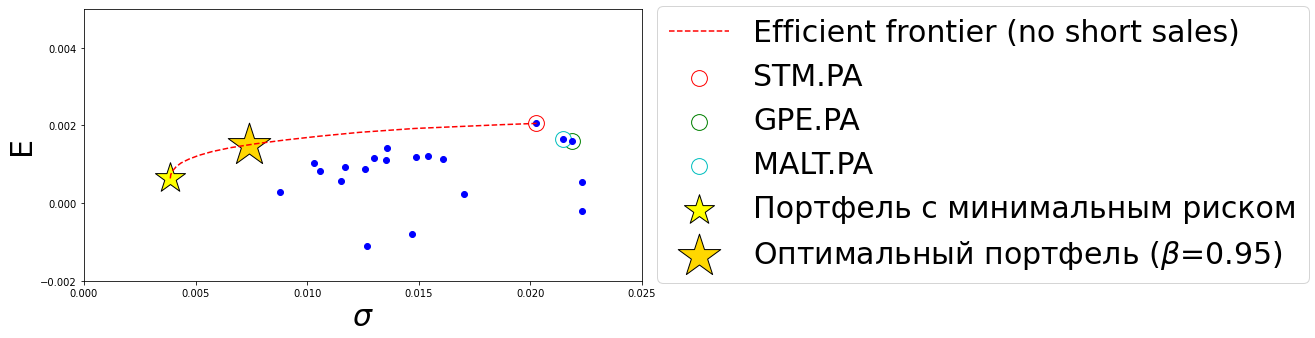

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(std_twenty_arr, mean_twenty_arr, 'bo')
plt.scatter(std_twenty_arr[11], mean_twenty_arr[11], c='w', marker='.', s=1000, edgecolors='red', label='STM.PA')
plt.scatter(std_twenty_arr[12], mean_twenty_arr[12], c='w', marker='.', s=1000, edgecolors='green', label='GPE.PA')
plt.scatter(std_twenty_arr[15], mean_twenty_arr[15], c='w', marker='.', s=1000, edgecolors='c', label='MALT.PA')
plt.scatter(min_risk, min_risk_preturn, c='yellow', marker='*', s=1000, edgecolors='black', label='Портфель с минимальным риском')
plt.scatter(risk_optimal_M, e_optimal_M, c='gold', marker='*', s=2000, edgecolors='black', label='Оптимальный портфель ($β$=0.95)')
plt.plot(sigmas, e, 'r--', label='Efficient frontier (no short sales)')
#plt.scatter(std_twenty_arr[18], mean_twenty_arr[18], 'go', label = 'SESL.PA',marker='.',s=2000)
plt.xlim([0, 0.025])
plt.ylim([-0.002, 0.005])
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


In [ ]:
beta = 0.99
b = (np.sqrt(2 * np.pi) *(1 - beta) )**(-1) * np.exp(-(norm.cdf(norm.ppf(beta))**2 / 2))
X_99 = optimize_portfolio(mean_vec, cov_matrix, b, bounds=((0, 1),))
print('b =', b)

b = 24.43903509069994


>**Состав оптимального портфеля в модели Марковица с заданным отношением к риску $β$=0.99**

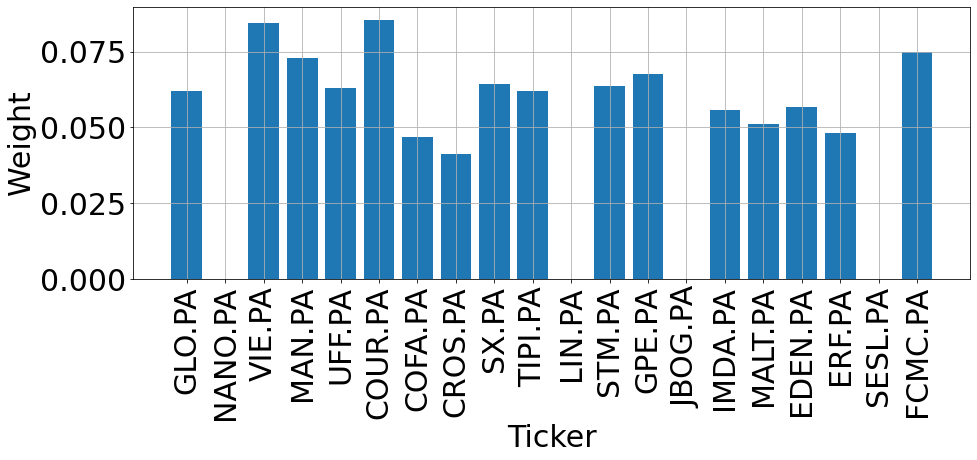

In [ ]:
plot_weights_histogram(X_99, twenty_tickers, b)

In [ ]:
risk_optimal_M_2 = get_risk(X_99, cov_matrix)
e_optimal_M_2 = np.dot(X_99, mean_vec)

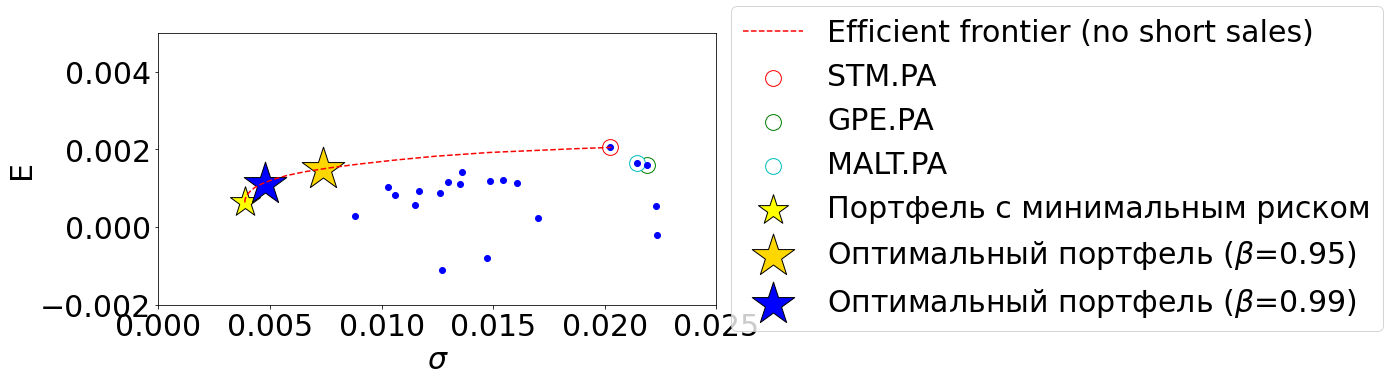

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(std_twenty_arr, mean_twenty_arr, 'bo')
plt.scatter(std_twenty_arr[11], mean_twenty_arr[11], c='w', marker='.', s=1000, edgecolors='red', label='STM.PA')
plt.scatter(std_twenty_arr[12], mean_twenty_arr[12], c='w', marker='.', s=1000, edgecolors='green', label='GPE.PA')
plt.scatter(std_twenty_arr[15], mean_twenty_arr[15], c='w', marker='.', s=1000, edgecolors='c', label='MALT.PA')
plt.scatter(min_risk, min_risk_preturn, c='yellow', marker='*', s=1000, edgecolors='black', label='Портфель с минимальным риском')
plt.scatter(risk_optimal_M, e_optimal_M, c='gold', marker='*', s=2000, edgecolors='black', label='Оптимальный портфель ($β$=0.95)')
plt.scatter(risk_optimal_M_2, e_optimal_M_2, c='blue', marker='*', s=2000, edgecolors='black', label='Оптимальный портфель ($β$=0.99)')
plt.plot(sigmas, e, 'r--', label='Efficient frontier (no short sales)')
plt.xlim([0, 0.025])
plt.ylim([-0.002, 0.005])
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


#**2. Оценка неопределенности оптимального портфеля в модели Марковица с заданным отношением к риску.**

###**2.1 - 2.3 Генерация выборки. Оценки $E^{est}, \sigma^{est}_{i,j}$. Решение задачи оптимизации.**

>**$-E^{est}(x)$+$b\sigma^{est}$(x) -> min \
$x_1+x_2+...+x_N=1$ \
$x_i≥0$**

>**T=30 (число наблюдений). Создаем выборку из нормального распределения.**

In [ ]:
T = 30
r_matrix_gen = np.random.multivariate_normal(mean_vec, cov_matrix, T)

In [ ]:
beta = 0.95
mean_vec_est = np.mean(r_matrix_gen, axis=0)
cov_matrix_est = np.cov(r_matrix_gen.T)
b = (np.sqrt(2 * np.pi) *(1 - beta) )**(-1) * np.exp(-(norm.cdf(norm.ppf(beta))**2 / 2))
X_est = optimize_portfolio(mean_vec_est, cov_matrix_est, b, bounds=((0, 1),))
print(b)

5.081181129383776


>**Значение целевой функции (для выборочного оптимального портфеля).**

In [ ]:
objective_value_est = objective_function(X_est, mean_vec_est, cov_matrix_est, b)
print("Objective func value = " + str(objective_value_est))

Objective func value = -0.003906957702747197


###**2.4 Сравнение выборочного и истинного портфелей.**

>**Состав выборочного оптимального портфеля.**

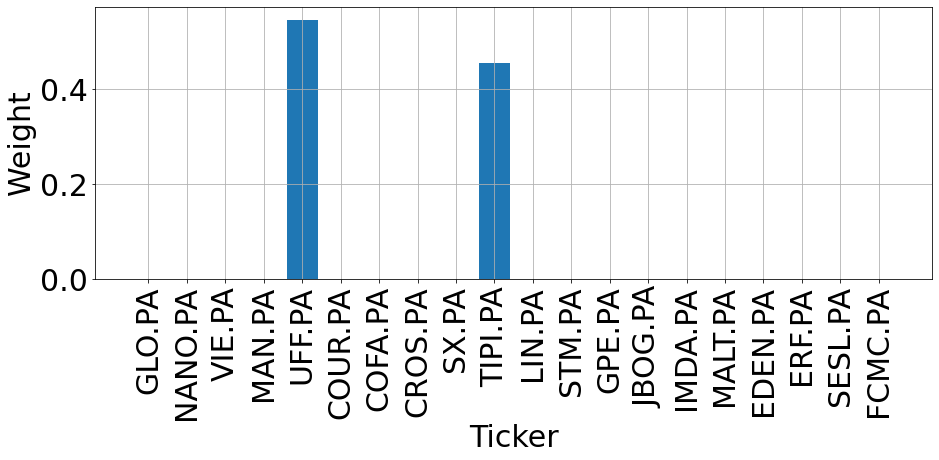

In [ ]:
plot_weights_histogram(X_est, twenty_tickers, b)

>**Состав истинного оптимального портфеля.**

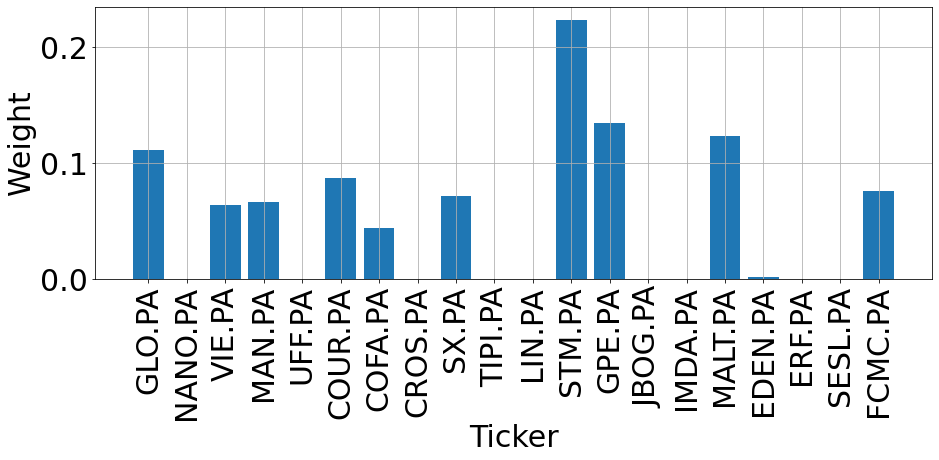

In [ ]:
plot_weights_histogram(X, twenty_tickers, b)

>**L1: Истинный - Выборочный.**

In [ ]:
print('L1 =', np.around(np.linalg.norm(X - X_est, ord=1), 3))

L1 = 2.0


In [ ]:
risk_optimal_M_est = get_risk(X_est, cov_matrix)
e_optimal_M_est = np.dot(X_est, mean_vec)

>**Плоскость $\sigma-E$.**

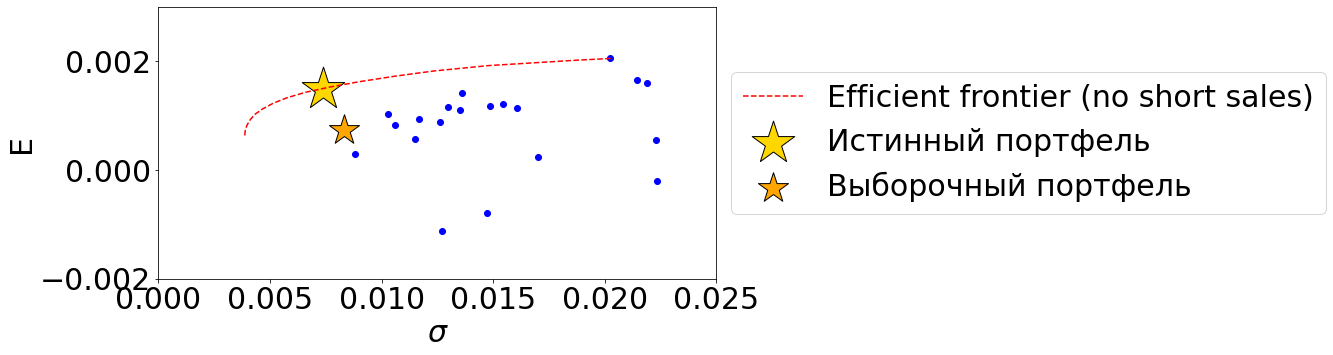

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(std_twenty_arr, mean_twenty_arr, 'bo')
plt.scatter(risk_optimal_M, e_optimal_M, c='gold', marker='*', s=2000, edgecolors='black', label='Истинный портфель')
#plt.scatter(risk_optimal_M_2, e_optimal_M_2, c='orange', marker='*', s=3000, edgecolors='black', label='Optimal portfolio with a given risk ratio ($\gamma$=0.99)')
plt.scatter(risk_optimal_M_est, e_optimal_M_est, c='orange', marker='*', s=1000, edgecolors='black', label='Выборочный портфель')
plt.plot(sigmas, e, 'r--', label='Efficient frontier (no short sales)')
plt.xlim([0, 0.025])
plt.ylim([-0.002, 0.003])
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

>**Выборочный портфель заметно отличается от истинного: значение доходности ниже, риск выше. Значение метрики L1 подтверждает расстояние между векторами-портфелями.**

###**2.5 Циклическое повторение эксперимента.**

In [ ]:
S = 40 
experiments = []
for i in tqdm_notebook(range(S)):
    experiment = {}
    experiment['i'] = i
    experiment['r_matrix_gen'] = np.random.multivariate_normal(mean_vec, cov_matrix, T)
    experiment['mean_vec_est'] = np.mean(experiment['r_matrix_gen'], axis=0)
    experiment['cov_matrix_est'] = np.cov(experiment['r_matrix_gen'].T)
    experiment['X_est'] =  optimize_portfolio( experiment['mean_vec_est'],experiment['cov_matrix_est'],b, bounds=((0, 1),))
    experiment['L1-norm'] = np.linalg.norm(X - experiment['X_est'], ord=1)
    experiment['sigma'] = get_risk(experiment['X_est'], cov_matrix)
    experiment['E'] = np.dot(experiment['X_est'], mean_vec)
    experiments.append(experiment)

  0%|          | 0/40 [00:00<?, ?it/s]

>**Среднее значение метрики L1 по 40 экспериментам.**

In [ ]:
l1_sum = 0
for i in range(S):
  l1_sum += experiments[i]['L1-norm']
print("Average L1 = " + str(l1_sum/S))

Average L1 = 1.5784024763819509


>**Плоскость $\sigma-E$.**

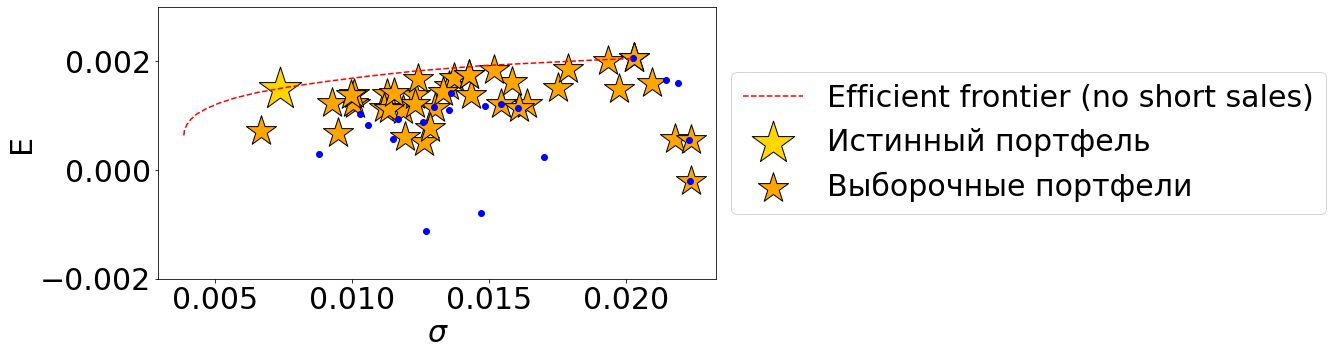

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(std_twenty_arr, mean_twenty_arr, 'bo')
for experiment in experiments:
  plt.scatter(experiment['sigma'], experiment['E'], c='orange', marker='*', s=1000, edgecolors='black')
plt.plot(sigmas, e, 'r--', label='Efficient frontier (no short sales)')
plt.scatter(risk_optimal_M, e_optimal_M, c='gold', marker='*', s=2000, edgecolors='black', label='Истинный портфель')
plt.scatter(experiment['sigma'], experiment['E'], c='orange', marker='*', s=1000, edgecolors='black', label='Выборочные портфели')
plt.ylim([-0.002, 0.003])
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

>**После проведения 40 повторений среднее значение нормы Минковского уменьшилось (-0.45), большинство выборочных портфелей по-прежнему занижают доходность истинного портфеля и отличаются от него по риску, однако некоторые близки или лежат на эффективном фронте.**

###**2.6 Циклическое повторение эксперимента. Точные значения математических ожиданий известны.**

>**$-E(x)$+$b\sigma^{est}$(x) -> min \
$x_1+x_2+...+x_N=1$ \
$x_i≥0$**

In [ ]:
S = 40 
experiments = []
for i in tqdm_notebook(range(S)):
    experiment = {}
    experiment['i'] = i
    experiment['r_matrix_gen'] = np.random.multivariate_normal(mean_vec, cov_matrix, T)
    experiment['mean_vec_est'] = np.mean(experiment['r_matrix_gen'], axis=0)
    experiment['cov_matrix_est'] = np.cov(experiment['r_matrix_gen'].T)
    experiment['X_est'] =  optimize_portfolio(mean_vec, experiment['cov_matrix_est'],b,bounds=((0, 1),))
    experiment['L1-norm'] = np.linalg.norm(X - experiment['X_est'], ord=1)
    experiment['sigma'] = get_risk(experiment['X_est'], cov_matrix)
    experiment['E'] = np.dot(experiment['X_est'], mean_vec)
    experiments.append(experiment)

  0%|          | 0/40 [00:00<?, ?it/s]

>**Среднее значение метрики L1 по 40 экспериментам.**

In [ ]:
l1_sum = 0
for i in range(S):
  l1_sum += experiments[i]['L1-norm']
print("Average L1 = " + str(l1_sum/S))

Average L1 = 0.37741272040837676


>**Плоскость $\sigma-E$.**

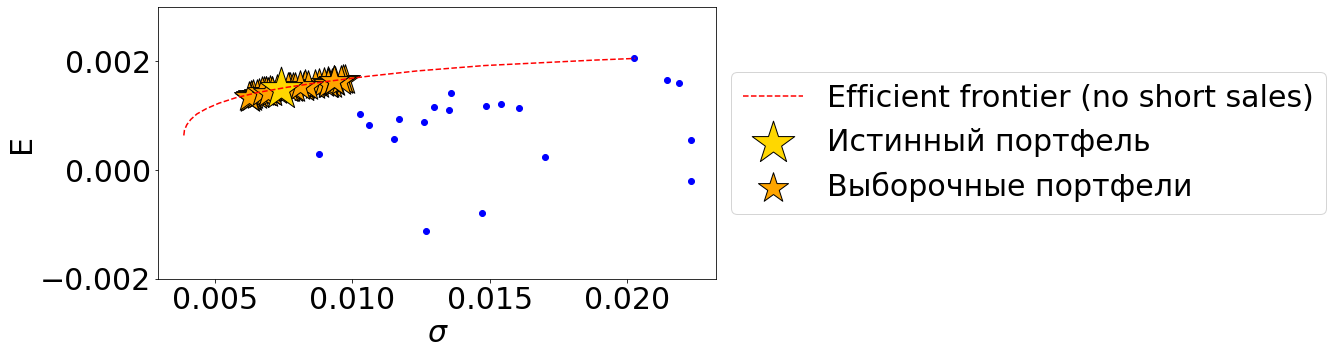

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(std_twenty_arr, mean_twenty_arr, 'bo')
for experiment in experiments:
  plt.scatter(experiment['sigma'], experiment['E'], c='orange', marker='*', s=1000, edgecolors='black')
plt.plot(sigmas, e, 'r--', label='Efficient frontier (no short sales)')
plt.scatter(risk_optimal_M, e_optimal_M, c='gold', marker='*', s=2000, edgecolors='black', label='Истинный портфель')
plt.scatter(experiment['sigma'], experiment['E'], c='orange', marker='*', s=1000, edgecolors='black', label='Выборочные портфели')
plt.ylim([-0.002, 0.003])
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

>**Выборочные портфели находятся значительно ближе к истинному на карте активов по сравнению с предыдущим экспериментом. Уменьшение значения нормы Минковского отражает это.**

#**3. Оценка неопределенности оптимального CVaR портфеля.**

###**3.1 Решение задачи ЛП для определения оптимального CVaR$_{0.95}$ портфеля.**

>$\alpha+∑_{t=1}^{T}u_{t}/(T(1-β))$ -> min \
$u_{t}≥0$ \
$x_{1}r_{1}(t)+x_{2}r_{2}(t)+...+x_{N}r_{N}(t)+\alpha+u_{t}≥0$ \

>**Python Linear programming solver**

In [ ]:
from scipy.optimize import linprog
T=30
N=20
u_m = r_matrix_gen.transpose()
constr_1 = []
for i in range(T):
  constr_t = [r_matrix_gen[i][j] for j in range(N)]
  constr_t.append(-1)
  constr_1.append(constr_t)
constr_2 = []
for i in range(T):
  constr_t = [u_m[j][i]-r_matrix_gen[i][j] for j in range(N)]
  constr_t.append(0)
  constr_2.append(constr_t)
constr_less = []
for i in range(len(constr_1)):
  constr_less.append(constr_1[i])
  constr_less.append(constr_2[i])
constr_less = np.array(constr_less)
constr_eq = [[1 for i in range(N)]]
constr_eq[0].append(0)
constr_eq = np.array(constr_eq)
coef = (-1)/(T*(1-beta))
c = [coef*sum(u_m[i]) for i in range(N)]
c.append((1-T))
c = np.array(c)
b_less = np.array([0 for i in range(len(constr_less))])
b_eq = np.array([1])
res = linprog(c, A_ub=constr_less, b_ub=b_less, A_eq=constr_eq, b_eq=b_eq,bounds=[(0,1) for i in range(N+1)])

In [ ]:
cvar_X_est_ls = res.x[:-1]

>**Optimize**

In [ ]:
T = 30
N = 20
def cvar_objective_function(vec_res, T, betta):
    return vec_res[-1] + 1/(T*(1- betta)) * np.sum(vec_res[:T])
def cvar_optimize_portfolio(r_matrix,beta,cvar_objective_function=cvar_objective_function):
    alpha  = 0 #Init value
    N = r_matrix.shape[1]
    X = np.ones(N)/ N 
    T = r_matrix.shape[0]
    vec_res = np.zeros(T+N+1)
    vec_res[-1] = alpha
    vec_res[:T] = np.dot(r_matrix,  X) - alpha
    vec_res[T:N+T]= X
    bounds_U = ((0, None),) * T
    bounds_X = ((0, 1),) * N
    bounds_alpha = ((None, None),)
    bounds = bounds_U + bounds_X + bounds_alpha
    constraints = []
    constraints.append({'type': 'eq', 'fun': lambda X: sum(X[T:N+T]) -1})
    def u_x_con(vec_res, r_matrix, i):
        return np.dot(r_matrix[i], vec_res[T:N+T]) + vec_res[-1] - vec_res[i],
    for i in range(T):
        constraints.append({'type': 'ineq','fun': u_x_con,'args': (r_matrix, i)})
    return minimize(cvar_objective_function,vec_res,args=(T, beta), method='SLSQP',constraints=constraints,bounds=bounds).x

In [ ]:
result = cvar_optimize_portfolio(r_matrix_gen, beta)
cvar_X_est = result[T:N+T]

>**Значение целевой функции оптимального CVaR портфеля.**

In [ ]:
print("Objective func value = " + str(cvar_objective_function(result, T, beta)))

Objective func value = 0.0004103052718434208


>**Состав оптимального CVaR портфеля (Linear solver).**

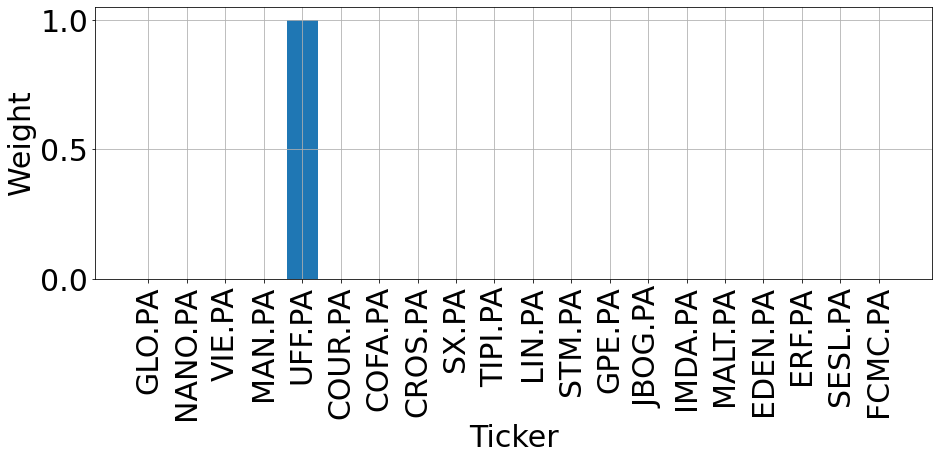

In [ ]:
plot_weights_histogram(cvar_X_est_ls, twenty_tickers, b)

>**Состав оптимального CVaR портфеля (Optimize).**

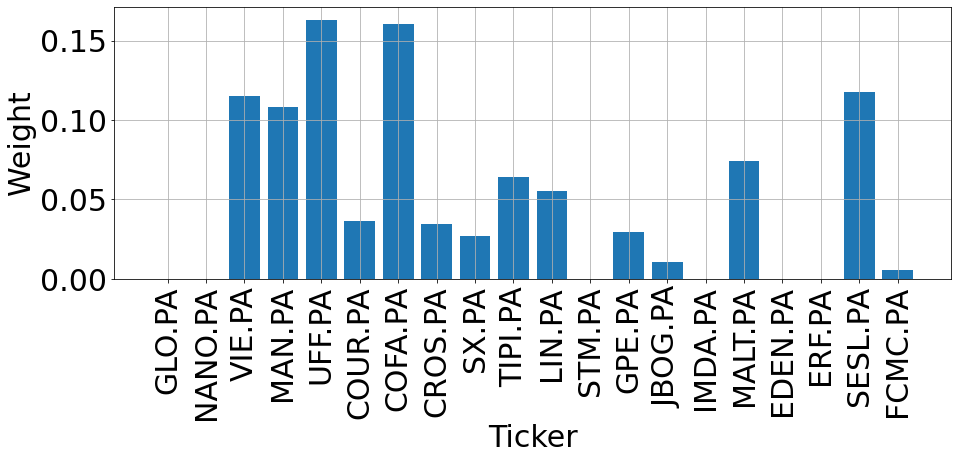

In [ ]:
plot_weights_histogram(cvar_X_est, twenty_tickers, b)

###**3.2 Сравнение с истинным и выборочным портфелями.**

>**Состав истинного портфеля.**

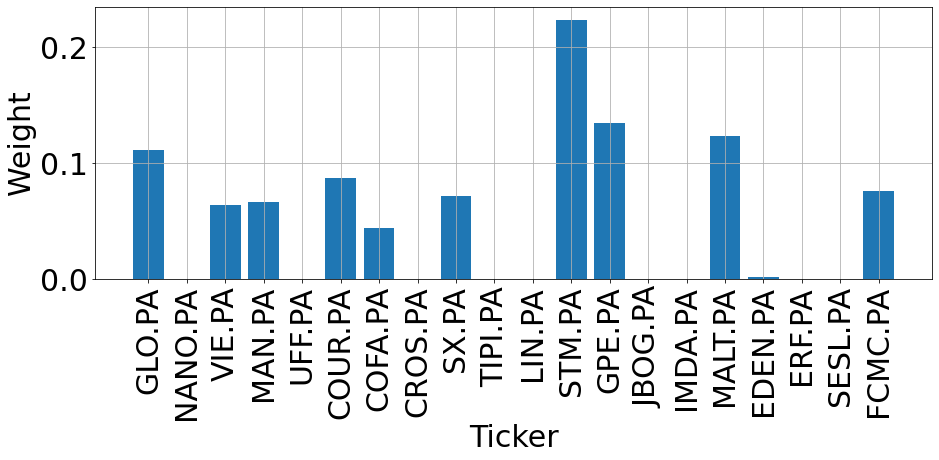

In [ ]:
plot_weights_histogram(X, twenty_tickers, b)

>**Состав выборочного портфеля.**

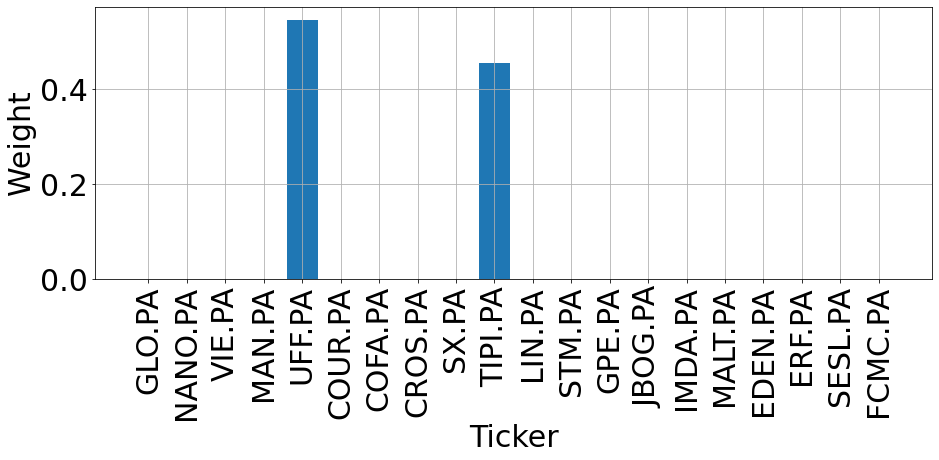

In [ ]:
plot_weights_histogram(X_est, twenty_tickers, b)

>**L1: Истинный - Оптимальный CVaR**

In [ ]:
print('L1 =', np.linalg.norm(X - cvar_X_est, ord=1))

L1 = 1.3095733630884598


>**L1: Выборочный - Оптимальный CVaR**

In [ ]:
print('L1 =', np.linalg.norm(X_est - cvar_X_est, ord=1))

L1 = 1.545078741587354


In [ ]:
risk_cvar_est = get_risk(cvar_X_est, cov_matrix)
e_cvar_est = np.dot(cvar_X_est, mean_vec)
risk_cvar_est_ls = get_risk(cvar_X_est_ls, cov_matrix)
e_cvar_est_ls = np.dot(cvar_X_est_ls, mean_vec)

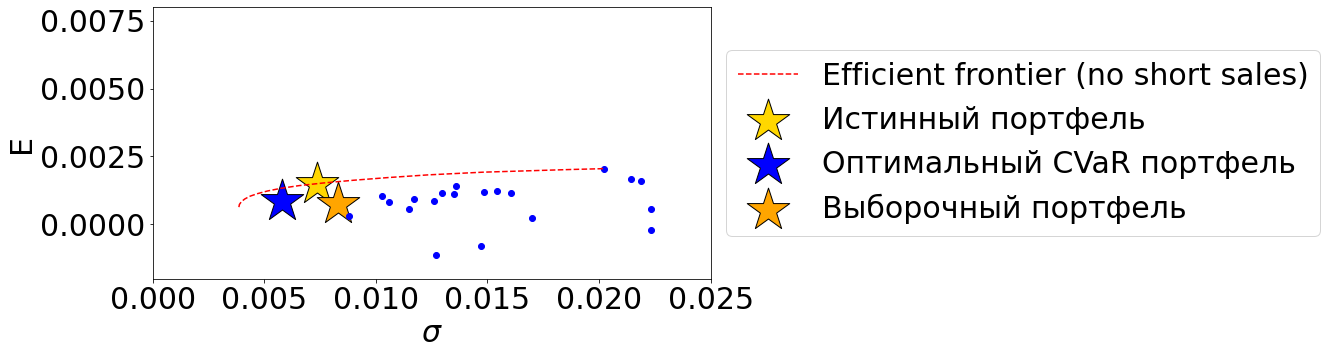

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(std_twenty_arr, mean_twenty_arr, 'bo')
plt.scatter(risk_optimal_M, e_optimal_M, c='gold', marker='*', s=2000, edgecolors='black', label='Истинный портфель')
plt.scatter(risk_cvar_est, e_cvar_est, c='blue', marker='*', s=2000, edgecolors='black', label='Оптимальный CVaR портфель')
plt.scatter(risk_optimal_M_est, e_optimal_M_est, c='orange', marker='*', s=2000, edgecolors='black', label='Выборочный портфель')
plt.plot(sigmas, e, 'r--', label='Efficient frontier (no short sales)')
plt.xlim([0, 0.025])
plt.ylim([-0.002, 0.008])
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

>**Оптимальный CVaR портфель ближе к истинному, чем выборочный портфель. Cостав портфелей - разный (например, акции компании STM.PA, которые составляют основную долю в истинном портфеле, не входят в оптимальный CVaR портфель).**

###**3.3 Циклическое повторение эксперимента.**

In [ ]:
experiments = []
for i in tqdm_notebook(range(S)):
    experiment = {}
    experiment['i'] = i
    experiment['r_matrix_gen'] = np.random.multivariate_normal(mean_vec, cov_matrix, T)
    experiment['mean_vec_est'] = np.mean(experiment['r_matrix_gen'], axis=0)
    experiment['cov_matrix_est'] = np.cov(experiment['r_matrix_gen'].T)
    result = cvar_optimize_portfolio(experiment['r_matrix_gen'], beta)
    experiment['X_est'] = result[T:N+T]
    experiment['L1-norm'] = np.linalg.norm(X - experiment['X_est'], ord=1)
    experiment['sigma'] = get_risk(experiment['X_est'], cov_matrix)
    experiment['E'] = np.dot(experiment['X_est'], mean_vec)
    experiments.append(experiment)

  0%|          | 0/40 [00:00<?, ?it/s]

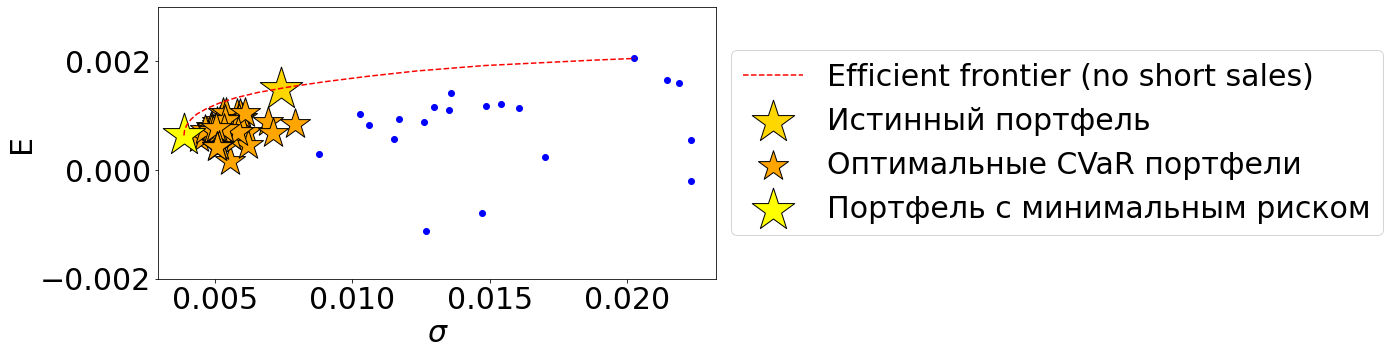

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
plt.plot(std_twenty_arr, mean_twenty_arr, 'bo')

#plt.scatter(risk_optimal_M_2, e_optimal_M_2, c='orange', marker='*', s=3000, edgecolors='black', label='Optimal portfolio with a given risk ratio ($\gamma$=0.99)')
for experiment in experiments:
  plt.scatter(experiment['sigma'], experiment['E'], c='orange', marker='*', s=1000, edgecolors='black')
plt.plot(sigmas, e, 'r--', label='Efficient frontier (no short sales)')
plt.scatter(risk_optimal_M, e_optimal_M, c='gold', marker='*', s=2000, edgecolors='black', label='Истинный портфель')
plt.scatter(experiment['sigma'], experiment['E'], c='orange', marker='*', s=1000, edgecolors='black', label='Оптимальные CVaR портфели')
plt.scatter(min_risk, min_risk_preturn, c='yellow', marker='*', s=2000, edgecolors='black', label='Портфель с минимальным риском')
plt.ylim([-0.002, 0.003])
plt.ylabel('E',size=30)
plt.xlabel('$\sigma$', size=30)
plt.rc('font', size=30)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

>**Среднее значение метрики L1 по 40 экспериментам.**

In [ ]:
l1_sum = 0
for i in range(S):
  l1_sum += experiments[i]['L1-norm']
print("Average L1 = " + str(l1_sum/S))

Average L1 = 1.3097484235968135


>**Ошибки для эксперимента с выборочными портфелями и эксперимента с оптимальными CVaR портфелями отличаются (1.58 vs 1.31)**

>**Получаемые оптимальные CVaR портфели сконцентрированы близко к портфелю с минимальным риском.**

In [ ]:
%%shell
jupyter nbconvert --to html /content/FrenchStockAnalysisLab3.ipynb

[NbConvertApp] Converting notebook /content/FrenchStockAnalysisLab3.ipynb to html
[NbConvertApp] Writing 1449966 bytes to /content/FrenchStockAnalysisLab3.html
